In [8]:
#FInal cleaned up notebook to turn in

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

playerShooting = pd.read_csv(r"C:\Users\student\Documents\isa330\Player Shooting.csv")

os.getcwd()

'C:\\Users\\student'

In [9]:
#turning the excel spreadsheet into a dataframe
df = pd.DataFrame(playerShooting)
#We all started by making the database from 2010 to 2024 rather than from 1947 to 2024. We did this becuase the 
#game has changed over the years and some stats that are recorded now were not recorded in the 1900s. 
df_present_final = df[df['season'] >= 2010]
#I then removed the columns that did not contain any statistics(birth_year) and the columns that I did not know the meaning of. 
#I kept the columns that I knew enough about in order to try to find patterns with them. 
df_present_final = df_present_final.drop(columns = ['fg_percent_from_x16_3p_range','fg_percent_from_x10_16_range','num_heaves_attempted','num_heaves_made','birth_year','fg_percent_from_x3_10_range','fg_percent_from_x0_3_range','percent_fga_from_x16_3p_range','percent_fga_from_x10_16_range','percent_fga_from_x3_10_range','percent_fga_from_x0_3_range','percent_assisted_x2p_fg','percent_assisted_x3p_fg','percent_corner_3s_of_3pa'])
#Lastly, I removed the rows of players that played less and 1000 minutes throughout their season. I did this to get rid of 
#any players that might have significantly high or low shooting percentage due to lack of shots attempted. I decided 
#to do this after the top 3pt percentages were all 100% due to players that only took 1 or 2 3pt shots during their season.
df_present_final = df_present_final[df_present_final['mp'] > 1000]
display(df_present_final)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x3p_range,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent
3,31139,2024,4219,Aaron Gordon,PF,28,10,NBA,DEN,73,2297,0.556,7.4,0.807,0.193,0.619,0.290,0.256,171,0.352
4,31140,2024,4582,Aaron Holiday,PG,27,6,NBA,HOU,78,1269,0.446,17.3,0.480,0.520,0.510,0.387,0.005,2,0.478
5,31141,2024,4805,Aaron Nesmith,SF,24,4,NBA,IND,72,1995,0.496,15.2,0.474,0.526,0.581,0.419,0.052,31,0.436
6,31142,2024,4900,Aaron Wiggins,SG,25,3,NBA,OKC,78,1228,0.562,10.7,0.666,0.334,0.598,0.492,0.042,12,0.404
10,31146,2024,3734,Al Horford,C,37,17,NBA,BOS,65,1740,0.511,17.2,0.384,0.616,0.658,0.419,0.045,18,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709,22728,2010,3793,Wilson Chandler,SG,22,3,NBA,NYK,65,2320,0.479,11.0,0.826,0.174,0.524,0.267,0.058,45,0.362
9711,22730,2010,3794,Yi Jianlian,PF,22,3,NBA,NJN,52,1655,0.403,11.8,0.927,0.073,0.406,0.366,0.075,35,0.000
9712,22731,2010,3363,Zach Randolph,PF,28,9,NBA,MEM,81,3051,0.488,7.5,0.961,0.039,0.496,0.288,0.002,3,0.286
9713,22732,2010,3494,Zaza Pachulia,C,25,7,NBA,ATL,78,1089,0.488,6.2,0.984,0.016,0.496,0.000,0.053,11,NaN


In [10]:
#This part of the code makes sure that the players listed have shot at least 20% of their attempts from the 3pt line
#this ensures that the players have enough 3pt shots for the percentages to not be thrown off by a lack of attempts.
df_3ptShooters = df_present_final[df_present_final['percent_fga_from_x3p_range']>.2]
#this sorts the values by their 3pt percentage 
df_3ptShooters = df_3ptShooters.sort_values(by='fg_percent_from_x3p_range', ascending= False)
display(df_3ptShooters)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x3p_range,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent
1160,30883,2023,4538,Luke Kennard,SG,26,6,NBA,TOT,59,1315,0.492,20.9,0.296,0.704,0.487,0.494,0.000,0,0.481
6505,25473,2015,3461,Kyle Korver,SG,33,12,NBA,ATL,75,2418,0.487,21.7,0.252,0.748,0.470,0.492,0.005,3,0.541
6,31142,2024,4900,Aaron Wiggins,SG,25,3,NBA,OKC,78,1228,0.562,10.7,0.666,0.334,0.598,0.492,0.042,12,0.404
141,31277,2024,4233,Dante Exum,PG,28,7,NBA,DAL,55,1088,0.533,11.9,0.642,0.358,0.557,0.491,0.056,14,0.457
9537,22556,2010,3276,Mike Miller,SG,29,10,NBA,WAS,54,1805,0.501,15.1,0.605,0.395,0.515,0.480,0.012,5,0.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,24266,2013,3201,Lamar Odom,PF,33,14,NBA,LAC,82,1616,0.399,11.6,0.754,0.246,0.464,0.200,0.033,10,0.158
4928,27561,2018,4578,Wes Iwundu,SF,23,1,NBA,ORL,62,1020,0.427,10.0,0.789,0.211,0.488,0.196,0.055,11,0.250
8127,23525,2012,3311,Earl Watson,PG,32,11,NBA,UTA,50,1033,0.338,14.1,0.675,0.325,0.407,0.192,0.000,0,0.111
2285,29001,2021,4591,Brad Wanamaker,PG,31,3,NBA,TOT,61,1053,0.385,12.2,0.716,0.284,0.463,0.188,0.017,5,0.000


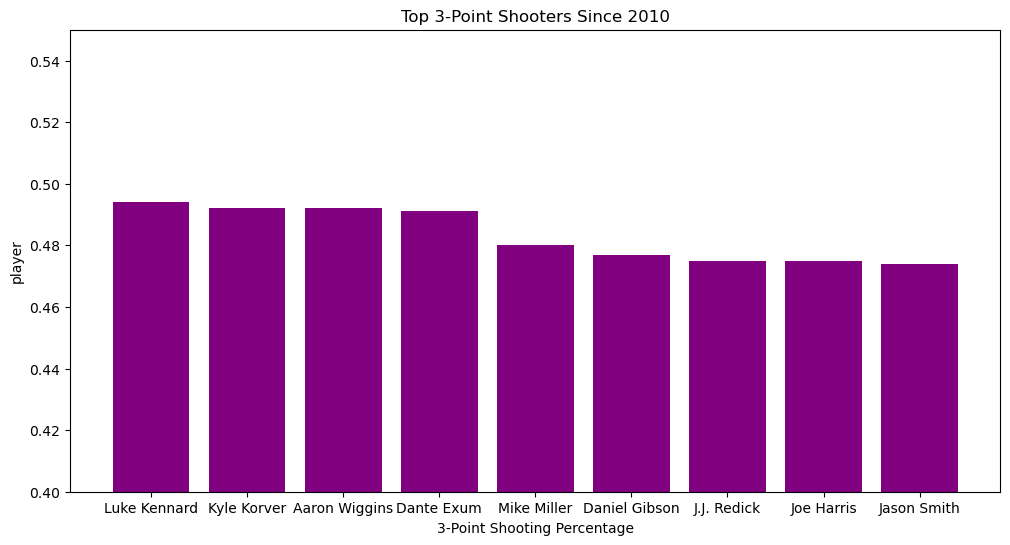

In [36]:
top_shot = df_3ptShooters.nlargest(10, 'fg_percent_from_x3p_range')

plt.figure(figsize=(12, 6))
plt.bar(top_shot['player'], top_shot['fg_percent_from_x3p_range'], color='purple')
plt.xlabel('3-Point Shooting Percentage')
plt.ylabel('player')
plt.title('Top 3-Point Shooters Since 2010')
plt.gca()
plt.ylim(0.4, 0.55)
plt.show()

In [32]:
plt.show?

In [4]:
df_PG_SG = df_present_final[(df_present_final['avg_dist_fga'] > 22) & (df_present_final['pos'].isin(['PG', 'SG']))]
df_PG_SG = df_PG_SG.sort_values(by='fg_percent', ascending=False)
display(df_PG_SG)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x3p_range,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent
3109,28470,2020,4611,Duncan Robinson,SG,25,2,NBA,MIA,73,2166,0.470,23.2,0.118,0.882,0.654,0.446,0.006,2,0.493
4675,27305,2018,3461,Kyle Korver,SG,36,15,NBA,CLE,73,1574,0.459,22.1,0.223,0.777,0.537,0.436,0.000,0,0.512
962,30685,2023,4839,Isaiah Joe,SG,23,3,NBA,OKC,73,1395,0.441,22.6,0.224,0.776,0.553,0.409,0.016,8,0.519
2909,29625,2021,3913,Wayne Ellington,SG,33,12,NBA,DET,46,1012,0.441,22.4,0.186,0.814,0.524,0.422,0.000,0,0.321
5529,26901,2017,3913,Wayne Ellington,SG,29,8,NBA,MIA,62,1500,0.416,22.1,0.290,0.710,0.509,0.378,0.007,4,0.414
2455,29171,2021,4718,Garrison Mathews,SG,24,2,NBA,WAS,64,1038,0.409,23.4,0.165,0.835,0.538,0.384,0.004,1,0.484
3992,27995,2019,3461,Kyle Korver,SG,37,16,NBA,UTA,54,1083,0.408,22.5,0.278,0.722,0.469,0.384,0.000,0,0.461
4902,27535,2018,4215,Troy Daniels,SG,26,5,NBA,PHO,79,1622,0.403,22.2,0.203,0.797,0.419,0.400,0.000,0,0.500
621,31757,2024,4883,Sam Merrill,SG,27,4,NBA,CLE,61,1069,0.402,23.6,0.099,0.901,0.385,0.404,0.000,0,0.449
1639,29875,2022,4611,Duncan Robinson,SG,27,4,NBA,MIA,79,2043,0.399,22.7,0.140,0.860,0.569,0.372,0.003,2,0.423


In [5]:
df_C_PF = df_present_final[(df_present_final['pos'].isin(['C', 'PF']))]
df_C_PF = df_C_PF.sort_values(by='fg_percent', ascending=False)
display(df_C_PF)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x3p_range,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent
2381,29100,2021,3810,DeAndre Jordan,C,32,13,NBA,BRK,57,1246,0.763,1.7,0.996,0.004,0.766,0.000,0.610,137,NaN
1977,30210,2022,4661,Mitchell Robinson,C,23,4,NBA,NYK,72,1848,0.761,1.2,1.000,0.000,0.761,NaN,0.583,178,NaN
172,31308,2024,5134,Dereck Lively II,C,19,1,NBA,DAL,55,1294,0.747,2.4,0.993,0.007,0.752,0.000,0.527,141,0.000
3398,28758,2020,4661,Mitchell Robinson,C,21,2,NBA,NYK,61,1412,0.742,1.3,1.000,0.000,0.742,NaN,0.616,185,NaN
2068,30301,2022,4667,Robert Williams,C,24,4,NBA,BOS,61,1804,0.736,2.4,0.997,0.003,0.738,0.000,0.470,157,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,29550,2021,4207,Solomon Hill,PF,29,8,NBA,ATL,71,1513,0.359,19.0,0.289,0.711,0.453,0.321,0.027,6,0.301
4803,27436,2018,4126,Quincy Acy,PF,27,6,NBA,BRK,70,1359,0.356,20.7,0.200,0.800,0.384,0.349,0.036,9,0.404
4846,27479,2018,4562,Semi Ojeleye,PF,23,1,NBA,BOS,73,1150,0.346,17.8,0.335,0.665,0.397,0.320,0.037,2,0.371
2237,28953,2021,4806,Aleksej Pokusevski,PF,19,1,NBA,OKC,45,1090,0.341,17.5,0.493,0.507,0.403,0.280,0.032,11,0.325


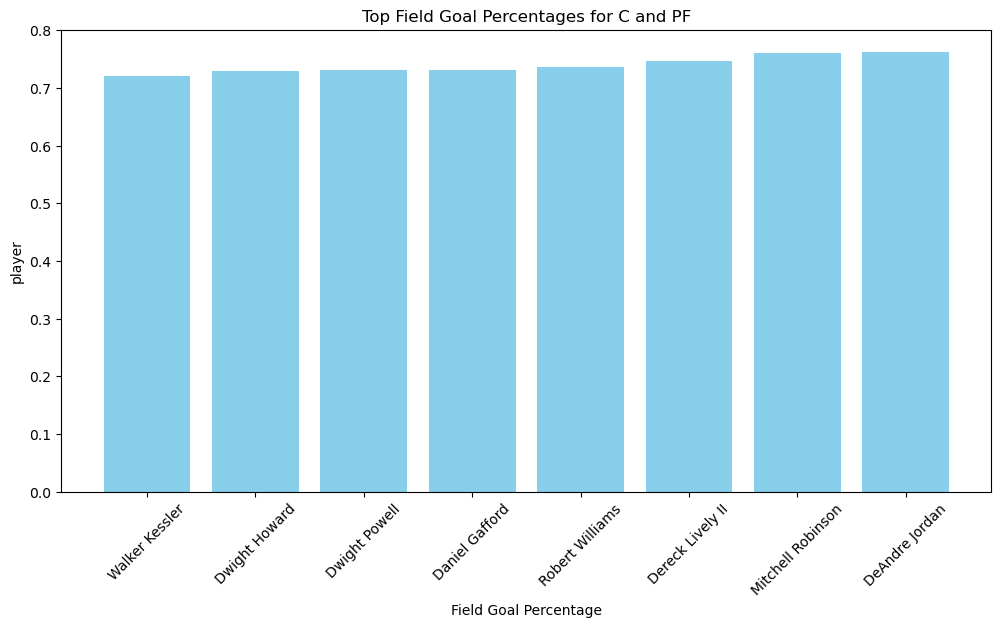

In [26]:
top_C_PF = df_C_PF.nlargest(10, 'fg_percent')

plt.figure(figsize=(12, 6))
plt.bar(top_C_PF['player'], top_C_PF['fg_percent'], color='skyblue')
plt.xlabel('Field Goal Percentage')
plt.ylabel('player')
plt.title('Top Field Goal Percentages for C and PF')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.show()


In [16]:
df_PG_SG_fg = df_present_final[(df_present_final['pos'].isin(['PG', 'SG']))]
df_PG_SG_fg = df_PG_SG_fg.sort_values(by='fg_percent', ascending=False)
display(df_PG_SG_fg)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x3p_range,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent
1677,29910,2022,4404,Gary Payton II,SG,29,6,NBA,GSW,71,1247,0.616,10.4,0.651,0.349,0.754,0.358,0.180,55,0.403
2976,28336,2020,4474,Ben Simmons,PG,23,3,NBA,PHI,57,2017,0.580,3.6,0.989,0.011,0.583,0.286,0.167,102,0.667
2593,29309,2021,4739,Juan Toscano-Anderson,SG,27,2,NBA,GSW,53,1107,0.579,12.9,0.560,0.440,0.718,0.402,0.134,26,0.321
767,30490,2023,4474,Ben Simmons,PG,26,5,NBA,BRK,42,1105,0.566,4.8,0.991,0.009,0.571,0.000,0.157,32,NaN
3626,27629,2019,4474,Ben Simmons,PG,22,2,NBA,PHI,79,2700,0.563,4.1,0.994,0.006,0.566,0.000,0.155,133,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,25727,2015,3166,Vince Carter,SG,38,17,NBA,MEM,66,1091,0.333,18.8,0.429,0.571,0.379,0.297,0.012,5,0.375
3268,28628,2020,4737,Jordan Poole,SG,20,1,NBA,GSW,57,1274,0.333,19.1,0.472,0.528,0.392,0.279,0.006,3,0.367
4977,26348,2017,4377,Andrew Harrison,PG,22,1,NBA,MEM,72,1474,0.325,15.7,0.567,0.433,0.363,0.276,0.006,1,0.429
7252,24959,2014,4192,Phil Pressey,PG,22,1,NBA,BOS,75,1132,0.308,16.5,0.581,0.419,0.340,0.264,0.008,2,0.143


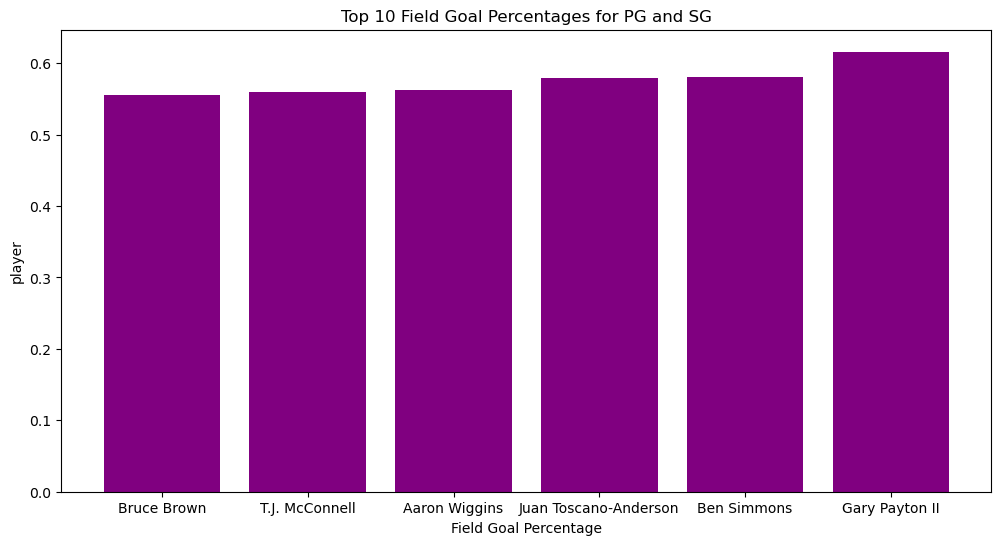

In [27]:
top_10_PG_SG_fg = df_PG_SG_fg.nlargest(10, 'fg_percent')

plt.figure(figsize=(12, 6))
plt.bar(top_10_PG_SG_fg['player'], top_10_PG_SG_fg['fg_percent'], color='purple')
plt.xlabel('Field Goal Percentage')
plt.ylabel('player')
plt.title('Top 10 Field Goal Percentages for PG and SG')
plt.gca().invert_xaxis()
plt.show()
#I made these last two visualizations in order to compare the fg percentages of guards with the fg percentage of C/PF.